# Part 1: Access satellite imagery using Python

## Introduction

* We consider optical satellite images from the [Sentinel-2 mission](https://sentinel.esa.int/web/sentinel/missions/sentinel-2), part of the European Union's [Copernicus](https://www.copernicus.eu/en) space programme. 
* We access Sentinel-2 data hosted on the Amazon Web Services (AWS) public cloud and part of the [Earth on AWS](https://aws.amazon.com/earth/) datasets. 
* These datasets can be accessed programmatically via a STAC compliant application programming interface (API).

## The SpatioTemporal Asset Catalog (STAC) specification

<center><img src="https://raw.githubusercontent.com/radiantearth/stac-site/master/images/logo/stac-030-long.png" width=300px></center>

[STAC](https://stacspec.org/en) is an emerging standard for describing geospatial data. Check out the [STAC index](https://stacindex.org) for the available catalogs!

In [ ]:
# If on Colab: uncomment and execute the following line
# ! pip install pystac-client shapely

## Search a STAC catalog

We query the [Earth Search](https://www.element84.com/earth-search/) STAC API endpoint from Python using the library `pystac_client` (library documentation [here](https://pystac-client.readthedocs.io/en/stable/)):

In [1]:
# STAC API URL 
api_url = 'https://earth-search.aws.element84.com/v1'

In [2]:
import pystac_client

In [3]:
client = pystac_client.Client.open(api_url)

In [6]:
for collection in client.get_collections():
    print(collection)

<CollectionClient id=naip>
<CollectionClient id=cop-dem-glo-30>
<CollectionClient id=landsat-c2-l2>
<CollectionClient id=sentinel-2-l2a>
<CollectionClient id=sentinel-2-l1c>
<CollectionClient id=cop-dem-glo-90>
<CollectionClient id=sentinel-1-grd>


Let's query the service for some satellite scenes using the following parameters:

In [7]:
# collection ID
collection = 'sentinel-2-l2a'

In [8]:
# AMS coordinates
lon = 4.89
lat = 52.37

In [9]:
# date range
datetime = '2020-03-20/2020-03-30'

In [10]:
import shapely

In [11]:
point = shapely.Point(lon, lat)

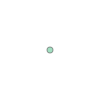

In [12]:
point

In [13]:
search = client.search(
    collections=[collection],
    intersects=point,
    datetime=datetime,
    # query=["eo:cloud_cover<15"],
)

In [14]:
search.matched()

4

In [15]:
items = search.get_all_items()

In [17]:
len(items)

4

In [18]:
for item in items:
    print(item)

<Item id=S2A_31UFU_20200328_0_L2A>
<Item id=S2B_31UFU_20200326_0_L2A>
<Item id=S2B_31UFU_20200323_0_L2A>
<Item id=S2A_31UFU_20200321_0_L2A>


In [19]:
item = items[0]

In [21]:
item.geometry

{'type': 'Polygon',
 'coordinates': [[[5.239432613310501, 53.228577890548],
   [6.141754296879459, 53.20819279121764],
   [6.071664488869862, 52.22257539160585],
   [4.814996623122647, 52.24860251101384],
   [5.239432613310501, 53.228577890548]]]}

In [22]:
item.datetime

datetime.datetime(2020, 3, 28, 10, 46, 21, 777000, tzinfo=tzutc())

In [23]:
item.properties

{'created': '2022-11-06T06:14:59.218Z',
 'platform': 'sentinel-2a',
 'constellation': 'sentinel-2',
 'instruments': ['msi'],
 'eo:cloud_cover': 10.348317,
 'proj:epsg': 32631,
 'mgrs:utm_zone': 31,
 'mgrs:latitude_band': 'U',
 'mgrs:grid_square': 'FU',
 'grid:code': 'MGRS-31UFU',
 'view:sun_azimuth': 161.396812076445,
 'view:sun_elevation': 39.118884842535,
 's2:degraded_msi_data_percentage': 0,
 's2:nodata_pixel_percentage': 33.321813,
 's2:saturated_defective_pixel_percentage': 0,
 's2:dark_features_percentage': 2.234646,
 's2:cloud_shadow_percentage': 0.851735,
 's2:vegetation_percentage': 36.76089,
 's2:not_vegetated_percentage': 17.856395,
 's2:water_percentage': 27.841628,
 's2:unclassified_percentage': 4.103604,
 's2:medium_proba_clouds_percentage': 2.222784,
 's2:high_proba_clouds_percentage': 7.55232,
 's2:thin_cirrus_percentage': 0.573214,
 's2:snow_ice_percentage': 0.002787,
 's2:product_type': 'S2MSI2A',
 's2:processing_baseline': '02.14',
 's2:product_uri': 'S2A_MSIL2A_202

In [24]:
items.save_object("mysearch.json")

## Access the assets

From the metadata, how do we get to the actual data (the "assets")? 

In [26]:
item.assets.keys()

dict_keys(['aot', 'blue', 'coastal', 'granule_metadata', 'green', 'nir', 'nir08', 'nir09', 'red', 'rededge1', 'rededge2', 'rededge3', 'scl', 'swir16', 'swir22', 'thumbnail', 'tileinfo_metadata', 'visual', 'wvp', 'aot-jp2', 'blue-jp2', 'coastal-jp2', 'green-jp2', 'nir-jp2', 'nir08-jp2', 'nir09-jp2', 'red-jp2', 'rededge1-jp2', 'rededge2-jp2', 'rededge3-jp2', 'scl-jp2', 'swir16-jp2', 'swir22-jp2', 'visual-jp2', 'wvp-jp2'])

In [31]:
item.assets["thumbnail"].href

'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_0_L2A/thumbnail.jpg'

In [32]:
item.assets["red"].href

'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_0_L2A/B04.tif'

In [34]:
asset = item.assets["red"]

In [37]:
dir(asset)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_repr_html_',
 'clone',
 'common_metadata',
 'description',
 'extra_fields',
 'from_dict',
 'get_absolute_href',
 'has_role',
 'href',
 'media_type',
 'owner',
 'roles',
 'set_owner',
 'title',
 'to_dict']

In [38]:
asset.extra_fields

{'eo:bands': [{'name': 'red',
   'common_name': 'red',
   'description': 'Red (band 4)',
   'center_wavelength': 0.665,
   'full_width_half_max': 0.038}],
 'gsd': 10,
 'proj:shape': [10980, 10980],
 'proj:transform': [10, 0, 600000, 0, -10, 5900040],
 'raster:bands': [{'nodata': 0,
   'data_type': 'uint16',
   'bits_per_sample': 15,
   'spatial_resolution': 10,
   'scale': 0.0001,
   'offset': 0}]}